## Analisi exploratorio y entrenamiento del modelo de predicción
- FERNANDO JOSE RUIZ NARANJO

In [57]:

import seaborn as sns
sns.set()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

Cargamos el data set Original

In [37]:
df_o = pd.read_csv('ObesityDataSet.csv')
df_o

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


**Interpretamos el significado de cada columna:**

- gender -> genero
- Age  -> edad
- Height -> altura
- wight -> anchura o peso (debe ser peso) 
- family_history_with_overweight {yes,no} -> si la familia sufre de sobre peso (es una valor boleano osea true o false)
- FAVC  -> Consumo frecuente de alimentos ricos en calorías
- FCVC -> Frecuencia de consumo de verduras
- NCP -> Número de comidas principales o numero de comidad al dia
- CAEC -> Consumo de alimentos entre comidas.
- SMOKE -> si fuma(respuesta verdadera o falso, osea un valor booleano)
- CH2O -> consumo de agua al dia
- SCC -> seguimiento de consumo de calorias (osea si sigues tu consumo de calorias, es si o no osea un valor booleano
- FAF -> frecuencia de actividad fisica
- TUE -> tiempo de uso de dispositivos electronicos
- CALC -> si consume alcoho(no, algunas veces, frecuenteente o siempre)
- MTRANS -> transporte utilizado(automovil, motocicleta, bicicleta, transporte_publico, caminando)
- NObeyesdad  -> este valor se crea en base a los demas y consta de lo siguiente (peso_insuficiente, peso_normal, sobrepeso_nivel1, sobrepeso_nivel2, obesidad_tipo1, obesidad_tipo2, obesidad_tipo3 )

### Identificamos los tipos numericos o float que se encuentren en el Dataset


In [38]:
df_o.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

Redondeamos solo la fila "Age" al entero más proximo y en las demás (tipo float64) reducimos los deciamales hasta tener dos.

In [39]:
dfAge = df_o["Age"].round()
dfHeight = df_o["Height"].round(decimals = 2)
dfWeight = df_o["Weight"].round(decimals = 2)
dfCH2O = df_o["CH2O"].round(decimals = 2)
dfFAF = df_o["FAF"].round(decimals = 2)
dfTUE = df_o["TUE"].round(decimals = 2)

df_o["Age"] = dfAge
df_o["Height"] = dfHeight
df_o["Weight"] = dfWeight
df_o["CH2O"] = dfCH2O
df_o["FAF"] = dfFAF
df_o["TUE"] = dfTUE
df_o

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.00,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.00,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.00,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.00,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.00,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21.0,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.91,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22.0,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.60,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23.0,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.65,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.0,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.59,Sometimes,Public_Transportation,Obesity_Type_III


Se traduce el nombre de las columnas al español, para facilitar el entendimiento

In [40]:
df_o = df_o.rename(columns={"family_history_with_overweight": "Historial_familiar", 
                        'Gender': 'Genero', 
                        'Age': 'Edad',
                        'FAVC': 'C_rico_calorias',
                        'FCVC': 'F_Consumo_verduras',
                        'NCP':'N_comidas',
                        'CAEC':'Meriendas',
                        'SMOKE':'Fumador',
                        'CH2O': 'Consumo_agua',
                        'SCC': 'Consumo_calorias',
                        'FAF': 'F_actvidad_fisica',
                        'TUE': 'T_uso_dispositivos',
                        'CALC': 'C_alcohol',
                        'MTRANS' : 'Medio_transporte',
                        'NObeyesdad': 'Tipo_obesidad',
                        'Height':  'Altura',
                        'Weight': 'Peso'
                       })
df_o

,Genero,Edad,Altura,Peso,Historial_familiar,C_rico_calorias,F_Consumo_verduras,N_comidas,Meriendas,Fumador,Consumo_agua,Consumo_calorias,F_actvidad_fisica,T_uso_dispositivos,C_alcohol,Medio_transporte,Tipo_obesidad
0,Female,21.0,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.00,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.00,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.00,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.00,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.00,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21.0,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.91,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22.0,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.60,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23.0,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.65,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.0,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.59,Sometimes,Public_Transportation,Obesity_Type_III


Para terminar, se traduce todo el Dataset al español y se carga nuevamente (con este se trabajará a lo largo del archivo)

In [42]:
df = pd.read_csv('ObesityDataNew.csv')
df

,Genero,Edad,Historial_familiar,C_rico_calorias,F_Consumo_verduras,N_comidas,Meriendas,Fumador,Consumo_agua,Consumo_calorias,F_actvidad_fisica,T_uso_dispositivos,C_alcohol,Medio_transporte,Tipo_obesidad
0,Femenino,21,Si,No,2,3,Algunas_veces,No,2.00,No,0.00,1.00,No,Transporte_Publico,Peso_normal
1,Femenino,21,Si,No,3,3,Algunas_veces,Si,3.00,Si,3.00,0.00,Algunas_veces,Transporte_Publico,Peso_normal
2,Masculino,23,Si,No,2,3,Algunas_veces,No,2.00,No,2.00,1.00,Frecuentemente,Transporte_Publico,Peso_normal
3,Masculino,27,No,No,3,3,Algunas_veces,No,2.00,No,2.00,0.00,Frecuentemente,Caminar,Sobrepeso_Nivel_I
4,Masculino,22,No,No,2,1,Algunas_veces,No,2.00,No,0.00,0.00,Algunas_veces,Transporte_Publico,Sobrepeso_Nivel_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Femenino,21,Si,Si,3,3,Algunas_veces,No,1.73,No,1.68,0.91,Algunas_veces,Transporte_Publico,Obesidad_Tipo_III
2107,Femenino,22,Si,Si,3,3,Algunas_veces,No,2.01,No,1.34,0.60,Algunas_veces,Transporte_Publico,Obesidad_Tipo_III
2108,Femenino,23,Si,Si,3,3,Algunas_veces,No,2.05,No,1.41,0.65,Algunas_veces,Transporte_Publico,Obesidad_Tipo_III
2109,Femenino,24,Si,Si,3,3,Algunas_veces,No,2.85,No,1.14,0.59,Algunas_veces,Transporte_Publico,Obesidad_Tipo_III


In [41]:
#Genero -> genero
#Edad  -> edad
#Altura -> altura
#Anchura -> anchura o peso (debe ser peso) 
#Historial_familiar -> si la familia sufre de sobre peso (es una valor boleano osea true o false)
#C_rico_calorias  -> Consumo frecuente de alimentos ricos en calorías
#F_Consumo_verduras -> Frecuencia de consumo de verduras
#N_comidas -> Número de comidas principales o numero de comidad al dia
#Meriendas -> Consumo de alimentos entre comidas.
#Fumador -> si fuma(respuesta verdadera o falso, osea un valor booleano)
#Consumo_agua -> consumo de agua al dia
#Consumo_calorias -> seguimiento de consumo de calorias (osea si sigues tu consumo de calorias, es si o no osea un valor booleano
#F_actvidad_fisica -> frecuencia de actividad fisica
#T_uso_dispositivos -> tiempo de uso de dispositivos electronicos
#C_alcohol -> si consume alcoho(no, algunas veces, frecuenteente o siempre)
#Medio_transporte -> transporte utilizado(automovil, motocicleta, bicicleta, transporte_publico, caminando)
#NObeyesdad  -> este valor se crea en base a los demas y consta de lo siguiente (peso_insuficiente, peso_normal, sobrepeso_nivel1, sobrepeso_nivel2, obesidad_tipo1, obesidad_tipo2, obesidad_tipo3 )

### Identificamos si hay algun valor null en la Dataset

In [6]:
df.isnull().sum()

Genero                0
Edad                  0
Historial_familiar    0
C_rico_calorias       0
F_Consumo_verduras    0
N_comidas             0
Meriendas             0
Fumador               0
Consumo_agua          0
Consumo_calorias      0
F_actvidad_fisica     0
T_uso_dispositivos    0
C_alcohol             0
Medio_transporte      0
Tipo_obesidad         0
dtype: int64

Como se ve en la sumatoria de cada fila no hay Null

### Aqui verificamos si en cada una de la filas no numericas mantienen los datos establecidos y rectificar si no tienen Outliers

In [8]:
df['Historial_familiar'].isin(['Si', 'No']).sum(), print("Historial_familiar")

Historial_familiar


(2111, None)

In [9]:
df['Genero'].isin(['Femenino', 'Masculino']).sum(), print("Genero")

Genero


(2111, None)

In [10]:
df['C_rico_calorias'].isin(['Si', 'No']).sum(), print("C_rico_calorias")

C_rico_calorias


(2111, None)

In [11]:
df['Meriendas'].isin(['No','Algunas_veces', 'frecuentemente', 'Siempre']).sum(), print("Meriendas")

Meriendas


(1869, None)

In [12]:
df['Fumador'].isin(['Si', 'No']).sum(), print("Fumador")

Fumador


(2111, None)

In [14]:
df['Consumo_calorias'].isin(['Si', 'No']).sum(), print("Consumo_calorias")

Consumo_calorias


(2111, None)

In [15]:
df['C_alcohol'].isin(['No', 'Algunas_veces', 'Frecuentemente', 'Siempre']).sum(), print("C_alcohol")

C_alcohol


(2111, None)

In [19]:
df['Medio_transporte'].isin(['Automovil', 'Moto', 'Bicicleta', 'Transporte_Publico', 'Caminar']).sum(), print("Medio_transporte")

Medio_transporte


(2111, None)

In [23]:
df['Tipo_obesidad'].isin(['Peso_normal', 'Sobrepeso_Nivel_I', 'Sobrepeso_Nivel_II', 'Peso_insuficiente', 'Obesidad_Tipo_II'
, 'Obesidad_Tipo_III', 'Obesidad_Tipo_I']).sum(), print("NObeyesdad")

NObeyesdad


(2111, None)

### Identificamos los tipos numericos o float que se encuentren en el Dataset

In [24]:
df.dtypes

Genero                 object
Edad                    int64
Historial_familiar     object
C_rico_calorias        object
F_Consumo_verduras      int64
N_comidas               int64
Meriendas              object
Fumador                object
Consumo_agua          float64
Consumo_calorias       object
F_actvidad_fisica     float64
T_uso_dispositivos    float64
C_alcohol              object
Medio_transporte       object
Tipo_obesidad          object
dtype: object

**Edad, F_Consumo_verduras, N_comidas** son del tipo de dato **int64**, mientras que **Consumo_agua, F_actvidad_fisica y T_uso_dispositivos** son del tipo **float64**

In [25]:
df

,Genero,Edad,Historial_familiar,C_rico_calorias,F_Consumo_verduras,N_comidas,Meriendas,Fumador,Consumo_agua,Consumo_calorias,F_actvidad_fisica,T_uso_dispositivos,C_alcohol,Medio_transporte,Tipo_obesidad
0,Femenino,21,Si,No,2,3,Algunas_veces,No,2.00,No,0.00,1.00,No,Transporte_Publico,Peso_normal
1,Femenino,21,Si,No,3,3,Algunas_veces,Si,3.00,Si,3.00,0.00,Algunas_veces,Transporte_Publico,Peso_normal
2,Masculino,23,Si,No,2,3,Algunas_veces,No,2.00,No,2.00,1.00,Frecuentemente,Transporte_Publico,Peso_normal
3,Masculino,27,No,No,3,3,Algunas_veces,No,2.00,No,2.00,0.00,Frecuentemente,Caminar,Sobrepeso_Nivel_I
4,Masculino,22,No,No,2,1,Algunas_veces,No,2.00,No,0.00,0.00,Algunas_veces,Transporte_Publico,Sobrepeso_Nivel_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Femenino,21,Si,Si,3,3,Algunas_veces,No,1.73,No,1.68,0.91,Algunas_veces,Transporte_Publico,Obesidad_Tipo_III
2107,Femenino,22,Si,Si,3,3,Algunas_veces,No,2.01,No,1.34,0.60,Algunas_veces,Transporte_Publico,Obesidad_Tipo_III
2108,Femenino,23,Si,Si,3,3,Algunas_veces,No,2.05,No,1.41,0.65,Algunas_veces,Transporte_Publico,Obesidad_Tipo_III
2109,Femenino,24,Si,Si,3,3,Algunas_veces,No,2.85,No,1.14,0.59,Algunas_veces,Transporte_Publico,Obesidad_Tipo_III


También, podemos ver como se relacionan dos atributos y entender mejor el comportamiento de nuestra población, por ejemplo, analicemos la relación entre el género y la edad de las personas encuestadas, así como saber en qué edad es más propenso a sufrir de algún tipo de obesidad:  

<AxesSubplot: xlabel='Genero', ylabel='Edad'>

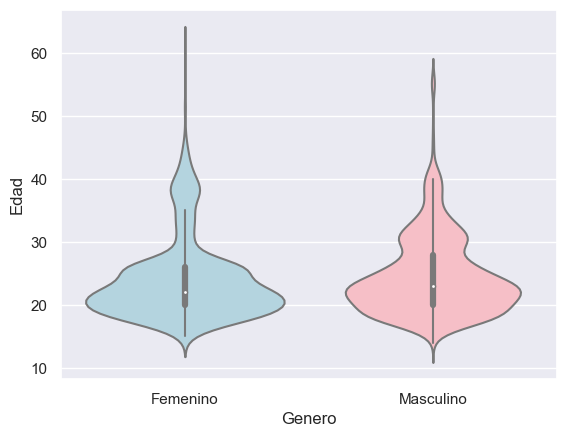

In [45]:
sns.violinplot(x="Genero", y="Edad", data=df, palette=["lightblue", "lightpink"])

**Conclusión:** La mayoría de las personas entrevistadas tienen una edad que esta alrededor de los 20 años, tanto para la población masculina como femenina.

In [46]:
df['Edad'].max()

61

<AxesSubplot: xlabel='Edad', ylabel='Tipo_obesidad'>

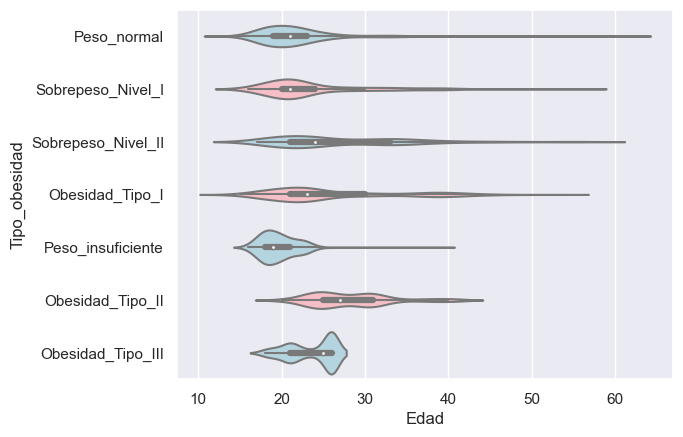

In [47]:
sns.violinplot(x="Edad", y="Tipo_obesidad", data=df, palette=["lightblue", "lightpink"])

**Conclusión:** Las personas con edad entre los 15 y 30 años son las más propensas a sufrir de obesidad tipo III que es la más riesgosa de todas, asimismo la mayoría de las personas (no todas) con peso insuficiente se encuentran en el intervalo entre los 15 a 25 años.

<AxesSubplot: xlabel='Historial_familiar', ylabel='Count'>

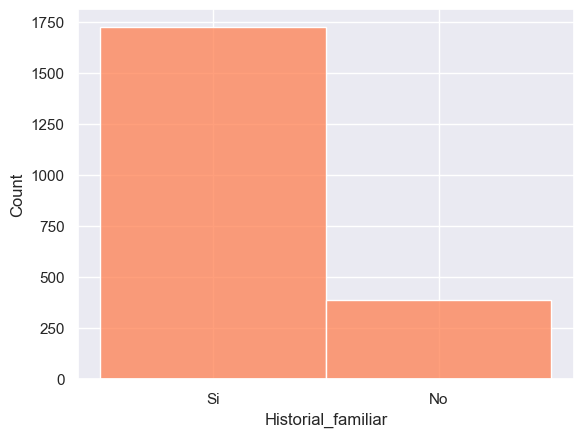

In [48]:
sns.histplot(df['Historial_familiar'], color='coral')

**Conclusión:** La mayoría de las personas reportan tener en su familia un familiar con exceso de peso, por tanto, se puede inferir que esta enfermedad puede ser transmitida por genética y por tanto el hecho de tener un familiar con sobre peso puede aumentar la probabilidad de sufrir de obesidad.

<AxesSubplot: xlabel='Tipo_obesidad', ylabel='Count'>

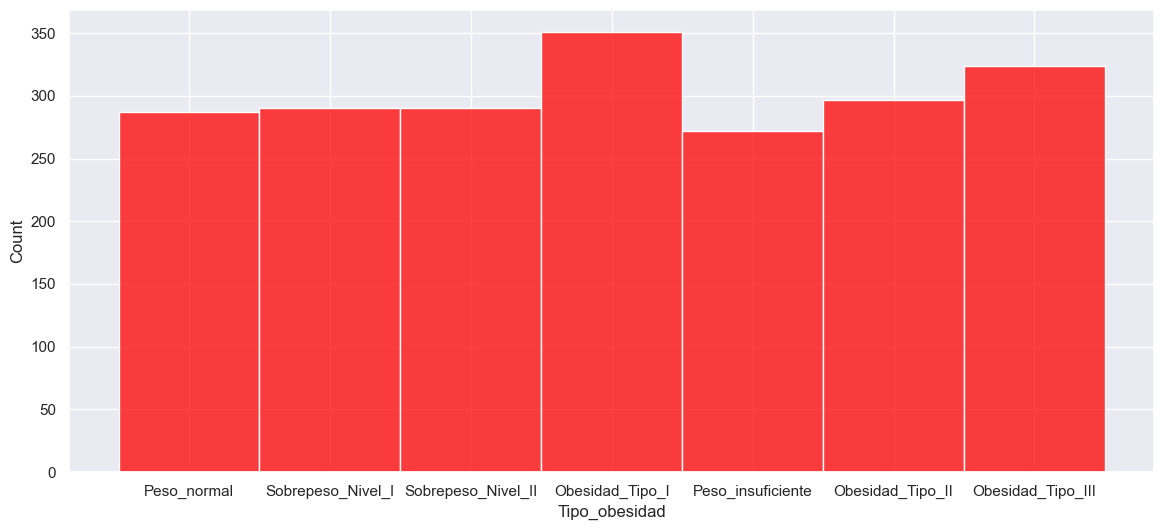

In [49]:
sns.set(rc = {'figure.figsize':(14,6)})
sns.histplot(df['Tipo_obesidad'], color='red')

## Seleccionando modelos de predicción y entrenandolos

In [97]:
x = pd.get_dummies(df[['Edad', 'F_Consumo_verduras', 'N_comidas', 'F_actvidad_fisica', 'Consumo_agua']].copy())
y  = df[['Tipo_obesidad']].copy()

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


Comprobamos que la cantidad de datos de entrenamiento y prueba sea igual al total global (2111 muestras)

In [98]:
len(X_train) + len(X_test)

2111

Aplicamos el primer modelo **RandomForest** y vemos su desempleño

In [111]:
random = RandomForestClassifier()
random.fit(X_train, y_train)
y_pred = random.predict(X_test)
print('El desempeño del modelo en accuracy es de :', accuracy_score(y_test,y_pred))

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_976\1792019473.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random.fit(X_train, y_train)


El desempeño del modelo en accuracy es de : 0.7304964539007093


In [112]:
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

   Obesidad_Tipo_I       0.65      0.70      0.68        70
  Obesidad_Tipo_II       0.89      0.89      0.89        62
 Obesidad_Tipo_III       0.92      1.00      0.96        65
 Peso_insuficiente       0.69      0.73      0.71        60
       Peso_normal       0.60      0.73      0.66        44
 Sobrepeso_Nivel_I       0.67      0.55      0.60        66
Sobrepeso_Nivel_II       0.64      0.50      0.56        56

          accuracy                           0.73       423
         macro avg       0.72      0.73      0.72       423
      weighted avg       0.73      0.73      0.73       423



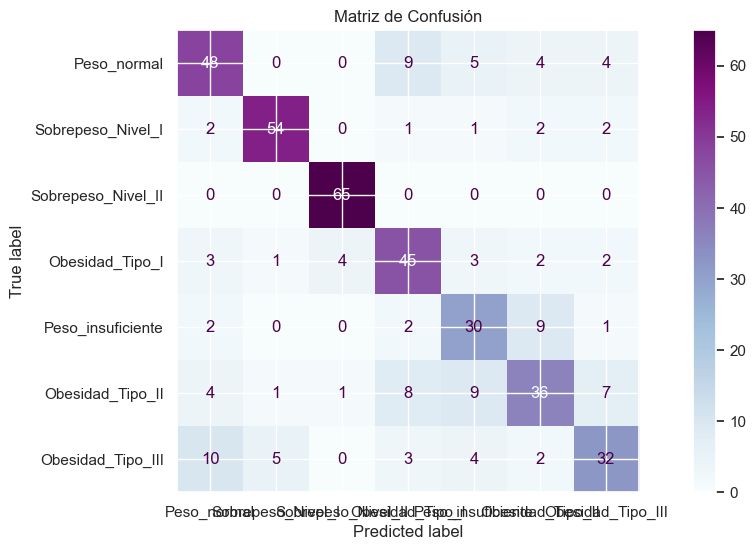

In [101]:
titles_options = [
    ("Matriz de Confusión", None)
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        random,
        X_test,
        y_test,
        display_labels=df['Tipo_obesidad'].unique(),
        cmap=plt.cm.BuPu,
        normalize=normalize,
    )
    disp.ax_.set_title(title)


plt.show()

Aplicando el modelo **HistGradientBoosting**

In [113]:
HistGradientBoosting = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)
HistGradientBoosting.score(X_test, y_test)

c:\Users\USUARIO\Desktop\web_app\env\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7092198581560284

In [114]:
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

   Obesidad_Tipo_I       0.65      0.70      0.68        70
  Obesidad_Tipo_II       0.89      0.89      0.89        62
 Obesidad_Tipo_III       0.92      1.00      0.96        65
 Peso_insuficiente       0.69      0.73      0.71        60
       Peso_normal       0.60      0.73      0.66        44
 Sobrepeso_Nivel_I       0.67      0.55      0.60        66
Sobrepeso_Nivel_II       0.64      0.50      0.56        56

          accuracy                           0.73       423
         macro avg       0.72      0.73      0.72       423
      weighted avg       0.73      0.73      0.73       423



print(clf.predict([[0, 0, 0, 0]]))
x = pd.get_dummies(df[['Edad', 'F_Consumo_verduras', 'N_comidas', 'F_actvidad_fisica', 'Consumo_agua']].copy())

In [197]:
print(HistGradientBoosting.predict([[21, 1, 0, 0.0, 3.0]]))

['Sobrepeso_Nivel_II']


c:\Users\USUARIO\Desktop\web_app\env\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [192]:
df['Consumo_agua']


0       2.00
1       3.00
2       2.00
3       2.00
4       2.00
        ... 
2106    1.73
2107    2.01
2108    2.05
2109    2.85
2110    2.86
Name: Consumo_agua, Length: 2111, dtype: float64

In [126]:
print(HistGradientBoosting.predict([[27, 3, 3, 2.00, 2.00 ]]))

['Sobrepeso_Nivel_I']


c:\Users\USUARIO\Desktop\web_app\env\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(


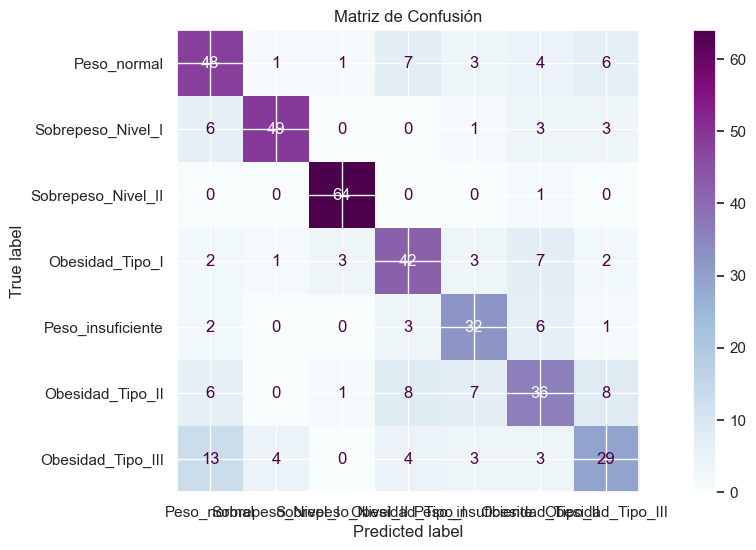

In [115]:
titles_options = [
    ("Matriz de Confusión", None)
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        HistGradientBoosting,
        X_test,
        y_test,
        display_labels=df['Tipo_obesidad'].unique(),
        cmap=plt.cm.BuPu,
        normalize=normalize,
    )
    disp.ax_.set_title(title)


plt.show()

Aplicado el modelo **DecisionTree**, tenemos:

In [116]:
DecisionTree = tree.DecisionTreeClassifier()
DecisionTree = DecisionTree.fit(X_train, y_train)
y_pred = DecisionTree.predict(X_test)
print('El desempeño del modelo en accuracy es de :', accuracy_score(y_test,y_pred))

El desempeño del modelo en accuracy es de : 0.6784869976359338


In [117]:
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

   Obesidad_Tipo_I       0.55      0.59      0.57        70
  Obesidad_Tipo_II       0.90      0.76      0.82        62
 Obesidad_Tipo_III       0.93      0.98      0.96        65
 Peso_insuficiente       0.64      0.73      0.68        60
       Peso_normal       0.52      0.68      0.59        44
 Sobrepeso_Nivel_I       0.60      0.55      0.57        66
Sobrepeso_Nivel_II       0.61      0.45      0.52        56

          accuracy                           0.68       423
         macro avg       0.68      0.68      0.67       423
      weighted avg       0.69      0.68      0.68       423



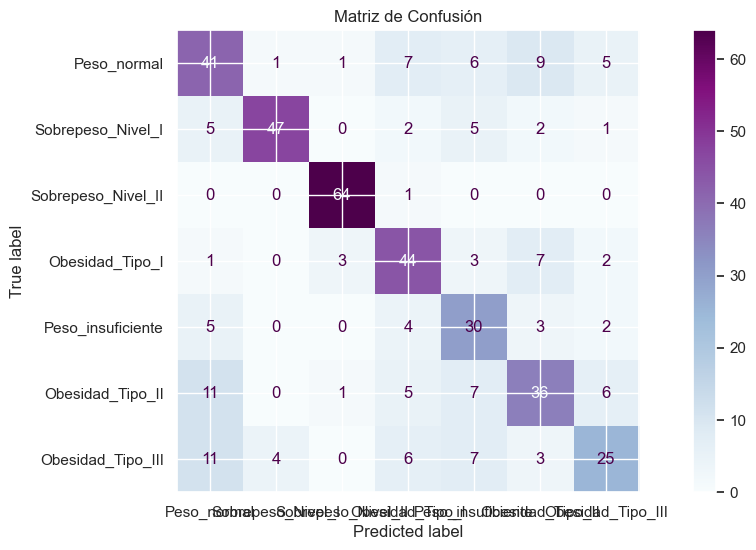

In [118]:
titles_options = [
    ("Matriz de Confusión", None)
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        DecisionTree,
        X_test,
        y_test,
        display_labels=df['Tipo_obesidad'].unique(),
        cmap=plt.cm.BuPu,
        normalize=normalize,
    )
    disp.ax_.set_title(title)


plt.show()

**Primeras Conclusiones**

Al probar diversos modelos de aprendizaje supervisados, se aprecia que el nivel de precisión varía según el modelo utilizado, donde se puede evidenciar que las mejores predicciones son las realizadas por los modelos **Hist Gradient Boosting** y **Random Forest** con precisión del **71,8%** y **71,3%** respectivamente, asimismo el modelo que más se equivoca es **Decision Tree** con un porcentaje de precisión del **67,6%.** También, es importante mencionar que con base en la matriz de confusión la categoría que mejor es predecida (por los tres modelos) es la de **Sobre peso Nivel II** y la categoria con menos aciertos es **Obesidad tipo II**.

### Aumentando el número de parametros a los modelos

In [119]:
RandomForest2 = RandomForestClassifier(n_estimators=1200, min_samples_split=4, random_state=0)
RandomForest2.fit(X_train, y_train)
y_pred = RandomForest2.predict(X_test)
print('El desempeño del modelo en accuracy es de :', accuracy_score(y_test, y_pred))

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_976\3640440317.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest2.fit(X_train, y_train)


El desempeño del modelo en accuracy es de : 0.7328605200945626


In [120]:
HistGradientBoosting2 = HistGradientBoostingClassifier(max_iter=80, learning_rate=0.1, ).fit(X_train, y_train)
y_pred = HistGradientBoosting2.predict(X_test)
print('El desempeño del modelo en accuracy es de :', accuracy_score(y_test, y_pred))

c:\Users\USUARIO\Desktop\web_app\env\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


El desempeño del modelo en accuracy es de : 0.7210401891252955


#### ¿Qué tan correpta son las predicciones con los datos originales?

In [121]:
RandomForest3 = RandomForestClassifier()
RandomForest3.fit(x, y)
y_pred = RandomForest3.predict(x)
print('El desempeño del modelo en accuracy es de :', accuracy_score(y,y))

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_976\1820250464.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest3.fit(x, y)


El desempeño del modelo en accuracy es de : 1.0


In [122]:
HistGradientBoosting3 = HistGradientBoostingClassifier(max_iter=100).fit(x, y)
HistGradientBoosting3.score(x, y)

c:\Users\USUARIO\Desktop\web_app\env\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9478919943154903

**Conclusión Proyecto**

Al utilizar varios parámetros con la intención de aumentar la precisión de los modelos, se percibió que aunque existe una mejora en la predicción, aparentemente no es muy significativa, debido a que solo aumento un porcentaje con respecto a la predicción del modelo sin parámetros. 
Se utilizará el modelo de clasificación **Hist Gradient Boosting** para el desarrollo del Dashbord.

In [127]:
import pickle
#with open('My_model.pkl','wb') as f:
  #  pickle.dump(HistGradientBoosting,f)

In [128]:
with open('My_model.pkl', 'rb') as lo:
    log_reg = pickle.load(lo)

In [190]:
print(log_reg.predict([[22, 3, 2, 3.0, 3.0 ]]))

['Obesidad_Tipo_I']


c:\Users\USUARIO\Desktop\web_app\env\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [151]:
class APIModelBackEnd:
    """
    Clase que se encarga la parte de prediccion.
    """

    def __init__(
        self,
        Edad,
        F_consumo_verduras,
        N_comidas,
        F_actvidad_fisica,
        Consumo_agua,
    ):
        self.Edad = Edad
        self.F_consumo_verduras = F_consumo_verduras
        self.N_comidas = N_comidas
        self.F_actividad_fisica = F_actvidad_fisica
        self.Consumo_agua = Consumo_agua

    def _load_model(self, model_filename: str = "My_model.pkl"):
        self.model = joblib.load(model_filename)

    def _preparar_datos(self):
        Edad = self.Edad
        F_Consumo_verduras = self.F_Consumo_verduras
        N_comidas = self.N_comidas
        F_actividad_fisica = self.F_actividad_fisica
        Consumo_agua = self.Consumo_agua

        data_predict = pd.DataFrame(
            columns=[
                "Edad",
                "F_Consumo_verduras",
                "N_comidas",
                "F_actvidad_fisica",
                "Consumo_agua",
            ],
            data=[[Edad, F_Consumo_verduras, Consumo_agua, N_comidas, F_actividad_fisica]],
        )

        return data_predict

    def predecir(self, y_name="Tipo_obesidad"):
        self._load_model()
        x = self._preparar_datos()
        prediction = pd.DataFrame(
            self.model.predict_proba(x))
        return prediction.to_dict(orient="records")


In [187]:
from pydantic import BaseModel as BM
from pydantic import Field
from typing import Literal
import joblib
import pandas as pd


class InputModelo(BM):

    Edad: int = Field(ge=14, le=161, description="Edad de la persona")
    F_consumo_verduras: int = Field(
        ge=1, le=3, description="Frecuencia en el consumo de verdura")
    N_comidas: int = Field(ge=1, le=3, description="Número de comidas al día")
    F_actvidad_fisica: float = Field(
        ge=0.00, le=3.00, description="Frecuencia de actividad fisica al día")
    Consumo_agua: float = Field(
        ge=1.00, le=3.00, description="Frecuencia de actividad fisica al día")

    class Config:
        schema_extra = {
            "example": {
                "Edad": 22,
                "F_consumo_verduras": 3,
                "N_comidas": 3,
                "F_actvidad_fisica": 3.0,
                "Consumo_agua": 3.0,
            }
        }


class OutputModelo(BM):
    """
    Clase que define la salida del modelo según la verá el usuario.
    """

    Tipo_obesidad: Literal['Peso_normal', 'Sobrepeso_Nivel_I', 'Sobrepeso_Nivel_II',
                           'Obesidad_Tipo_I', 'Peso_insuficiente', 'Obesidad_Tipo_II', 'Obesidad_Tipo_III']

    class Config:
        scheme_extra = {
            "example": {
                "Tipo_obesidad": 'Peso_normal',
            }
        }


class APIModelBackEnd:
    """
    Clase que se encarga la parte de prediccion.
    """

    def __init__(
        self,
        Edad,
        F_consumo_verduras,
        N_comidas,
        F_actvidad_fisica,
        Consumo_agua,
    ):
        self.Edad = Edad
        self.F_consumo_verduras = F_consumo_verduras
        self.N_comidas = N_comidas
        self.F_actividad_fisica = F_actvidad_fisica
        self.Consumo_agua = Consumo_agua

    def _load_model(self, model_filename: str = "My_model.pkl"):
        self.model = joblib.load(model_filename)

    def _preparar_datos(self):
        Edad = self.Edad
        F_Consumo_verduras = self.F_consumo_verduras
        N_comidas = self.N_comidas
        F_actividad_fisica = self.F_actividad_fisica
        Consumo_agua = self.Consumo_agua

        data_predict = pd.DataFrame(
            columns=[
                "Edad",
                "F_Consumo_verduras",
                "N_comidas",
                "F_actvidad_fisica",
                "Consumo_agua",
            ],
            data=[[Edad, F_Consumo_verduras, Consumo_agua,
                   N_comidas, F_actividad_fisica]],
        )

        return data_predict

    def predecir(self, y_name="Tipo_obesidad"):
        self._load_model()
        x = self._preparar_datos()
        prediction = pd.DataFrame(
            self.model.predict(x))
        return prediction.to_dict(orient="records")


In [188]:
ejemplo  = APIModelBackEnd(22, 3, 2, 3.0, 3.0)

In [189]:
ejemplo.predecir()

[{0: 'Peso_insuficiente'}]

In [160]:
df['Tipo_obesidad'].unique()

array(['Peso_normal', 'Sobrepeso_Nivel_I', 'Sobrepeso_Nivel_II',
       'Obesidad_Tipo_I', 'Peso_insuficiente', 'Obesidad_Tipo_II',
       'Obesidad_Tipo_III'], dtype=object)